# Codecademy Final Project
## Insurance 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
class InsuranceAnalysis:
    def __init__(self, data_file):
        self.data = pd.read_csv(data_file)
        self.data['sex'] = self.data['sex'].astype('category')
        self.data['children'] = self.data['children'].astype('category')
        self.data['smoker'] = self.data['smoker'].astype('category')
        self.data['region'] = self.data['region'].astype('category')
    
    def describe_data(self):
        return self.data.describe(include='all')
    
    def plot_charges_boxplot(self):
        plt.boxplot(self.data['charges'], vert=True)
        plt.ylabel('Charges')
        plt.title('Plots by Children Variable')
        plt.show()
    
    def plot_categorical_charges_boxplot(self):
        sns.catplot(data=self.data, x='children', y='charges', kind='box', height=4, aspect=2)
        sns.catplot(data=self.data, x='smoker', y='charges', kind='box', height=4, aspect=2)
        sns.catplot(data=self.data, x='region', y='charges', kind='box', height=4, aspect=2)
        plt.show()
    
    def plot_missing_values_heatmap(self):
        sns.heatmap(self.data.isna(), cbar=False)
    
    def count_missing_values(self):
        return self.data.isnull().sum()
    
    def get_dummies(self):
        return pd.get_dummies(self.data, drop_first=True, dtype=int)



                age   sex          bmi  children smoker     region  \
count   1338.000000  1338  1338.000000    1338.0   1338       1338   
unique          NaN     2          NaN       6.0      2          4   
top             NaN  male          NaN       0.0     no  southeast   
freq            NaN   676          NaN     574.0   1064        364   
mean      39.207025   NaN    30.663397       NaN    NaN        NaN   
std       14.049960   NaN     6.098187       NaN    NaN        NaN   
min       18.000000   NaN    15.960000       NaN    NaN        NaN   
25%       27.000000   NaN    26.296250       NaN    NaN        NaN   
50%       39.000000   NaN    30.400000       NaN    NaN        NaN   
75%       51.000000   NaN    34.693750       NaN    NaN        NaN   
max       64.000000   NaN    53.130000       NaN    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237 

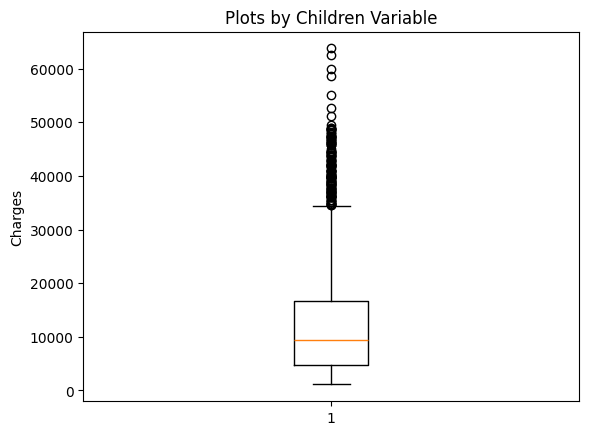

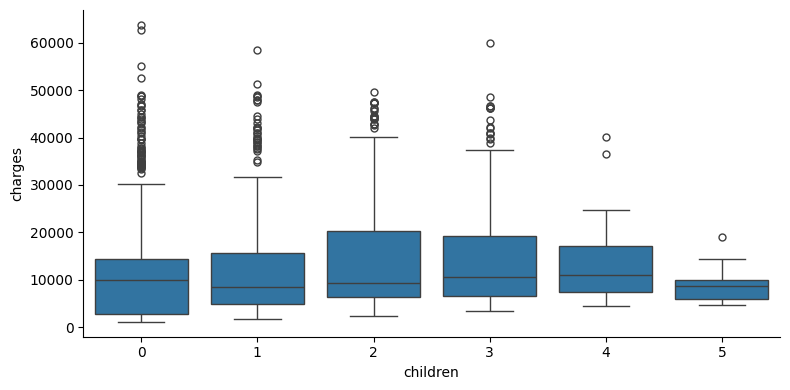

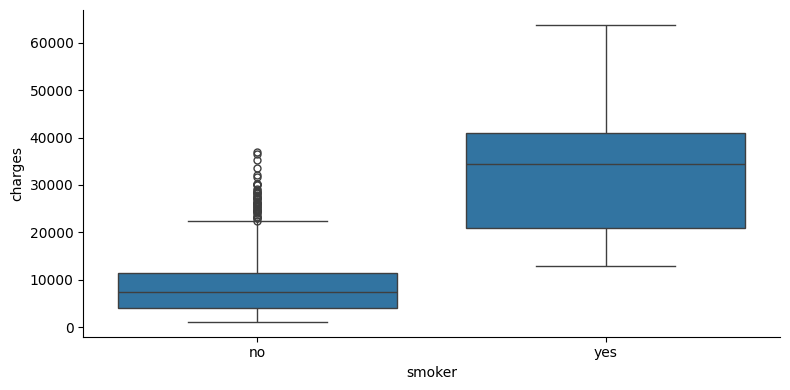

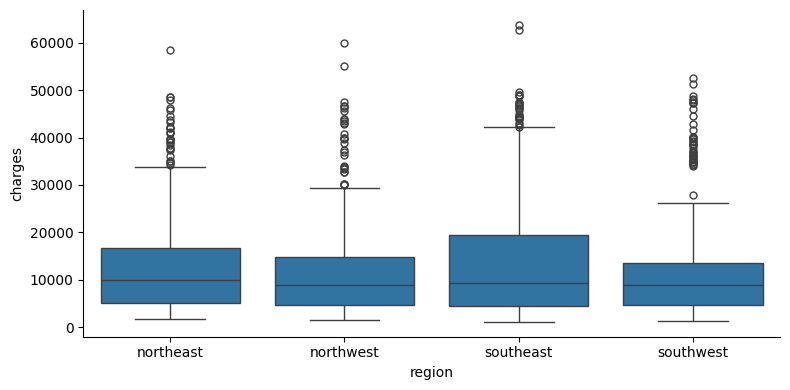

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
      age     bmi      charges  sex_male  children_1  children_2  children_3  \
0      19  27.900  16884.92400         0           0           0           0   
1      18  33.770   1725.55230         1           1           0           0   
2      28  33.000   4449.46200         1           0           0           1   
3      33  22.705  21984.47061         1           0           0           0   
4      32  28.880   3866.85520         1           0           0           0   
...   ...     ...          ...       ...         ...         ...         ...   
1333   50  30.970  10600.54830         1           0           0           1   
1334   18  31.920   2205.98080         0           0           0           0   
1335   18  36.850   1629.83350         0           0           0           0   
1336   21  25.800   2007.94500         0           0           0           0   
1337   61

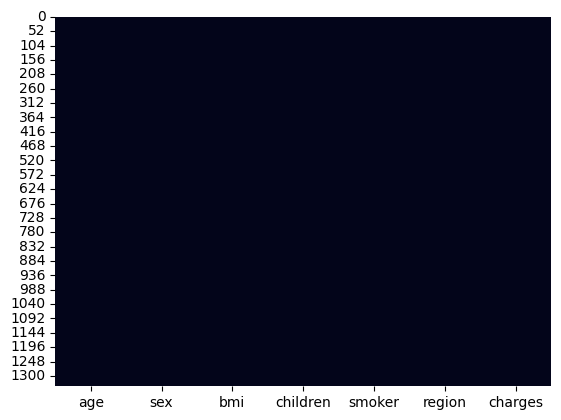

In [15]:
# Create an instance of the InsuranceAnalysis class
analysis = InsuranceAnalysis('insurance.csv')

# Call the describe_data() method
description = analysis.describe_data()
print(description)

# Call the plot_charges_boxplot() method
analysis.plot_charges_boxplot()

# Call the plot_categorical_charges_boxplot() method
analysis.plot_categorical_charges_boxplot()

# Call the plot_missing_values_heatmap() method
analysis.plot_missing_values_heatmap()

# Call the count_missing_values() method
missing_values = analysis.count_missing_values()
print(missing_values)

# Call the get_dummies() method
dummies = analysis.get_dummies()
print(dummies)



Coefficients: 
 [  257.99133135   335.00720191   -31.35109431   327.92873142
  1567.01989131   619.54900685  3298.10969907   942.72108718
 23656.2547357   -420.43118902  -669.45598238  -824.02947743]
Mean squared error: 33756429.70
Coefficient of determination: 0.78
R2 score: 0.78


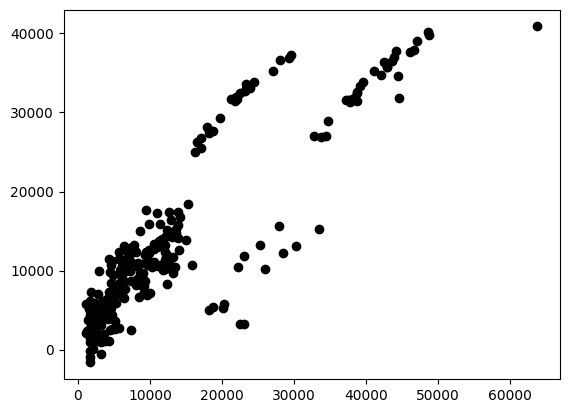

In [16]:
# Modelling

# Split the data into train and test
train, test = train_test_split(analysis.get_dummies(), test_size=0.2, random_state=42)

# Create a Linear Regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(train.drop('charges', axis=1), train['charges'])

# Make predictions using the testing set
predictions = lr.predict(test.drop('charges', axis=1))

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test['charges'], predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test['charges'], predictions))

# Plot outputs
plt.scatter(test['charges'], predictions,  color='black')
# print R2 score
print('R2 score: %.2f' % r2_score(test['charges'], predictions))




In [5]:
def model_and_evaluate(self):
    # Split the data into train and test
    train, test = train_test_split(self.data, test_size=0.2, random_state=42)

    # Create a Linear Regression object
    lr = LinearRegression()

    # Train the model using the training sets
    lr.fit(train.drop('charges', axis=1), train['charges'])

    # Make predictions using the testing set
    predictions = lr.predict(test.drop('charges', axis=1))

    # The coefficients
    print('Coefficients: \n', lr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
            % mean_squared_error(test['charges'], predictions))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
            % r2_score(test['charges'], predictions))

    # Plot outputs
    plt.scatter(test['charges'], predictions,  color='black')
    # print R2 score
    print('R2 score: %.2f' % r2_score(test['charges'], predictions))